In [1]:
fn1 = "julia"
ln1 = "togashi_de_miranda"
filename = "_".join(map(lambda s: s.strip().lower(),
                    ["SD-TSIA204_lab2", ln1, fn1])) + ".ipynb"
print(filename)


sd-tsia204_lab2_togashi_de_miranda_julia.ipynb


In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import scale


In [3]:
sns.reset_defaults()
sns.set(style='darkgrid', palette='colorblind')


# Exercice 1

In [4]:
# Loading the data
df = pd.read_csv('data_tp_2.csv')
df.head()


,X76,X95,X52,X36,X74,X69,X23,X27,X19,X39,...,X45,X67,X16,X37,X56,X35,X87,X89,X96,Y
0,-0.208298,0.793446,-0.200865,-0.005766,-0.336092,0.037238,0.148319,-1.423624,-0.411594,0.541975,...,-0.216825,0.552672,0.499400,0.134669,-1.639742,-0.004640,-0.635006,-0.758949,0.488324,24.0
1,-0.221028,-0.363311,-0.631604,1.152664,-0.532182,1.176513,-0.100142,1.170051,0.360931,0.593115,...,0.571930,-0.186832,-0.238081,1.404931,0.489104,0.248675,0.361039,0.435418,-1.324025,21.6
2,-1.059124,-0.777557,-0.172609,0.767116,0.141027,0.677921,0.820292,-0.255193,0.691621,0.254366,...,-0.643929,-0.543850,-0.478493,-0.386637,0.175114,-0.658092,-0.338583,-0.177981,-0.050339,34.7
3,1.133450,-0.790638,-0.586627,0.942378,0.283674,-0.577118,-0.145977,-0.263209,1.435926,-0.750034,...,0.719154,0.056236,-0.495367,0.204324,-1.078683,0.640999,-0.921276,-0.602238,0.421393,33.4
4,0.908181,-0.913293,0.362265,-0.437131,0.514517,-1.625222,1.019997,-0.422887,0.140903,-0.073760,...,1.026587,-0.230706,0.151710,-0.638937,0.072631,-0.517829,-1.028707,0.465484,0.351005,36.2


In [5]:
# Separating the data frame in two matrices:
# X (covariates) and Y (variable to be predicted)
Y = df.Y
df = df.drop('Y', axis=1)
X = df.values
n, p = X.shape
print(n, p)


506 100


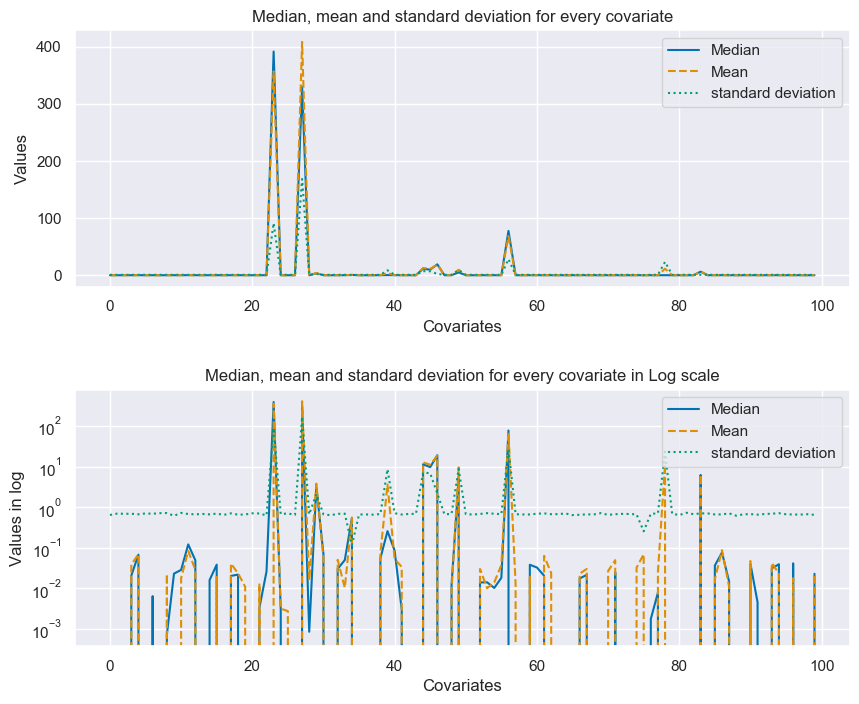

In [6]:
# Plotting the median, mean, and standard deviation

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
fig.subplots_adjust(hspace=0.4)

ax1.plot(np.median(X, axis=0), label='Median')
ax1.plot(X.mean(axis=0), label='Mean', ls='--')
ax1.plot(X.std(axis=0), label='standard deviation', ls='dotted')
ax1.legend(loc=1)
ax1.set_title('Median, mean and standard deviation for every covariate')
ax1.set_xlabel('Covariates')
ax1.set_ylabel('Values')

ax2.plot(np.median(X, axis=0), label='Median')
ax2.plot(X.mean(axis=0), label='Mean', ls='--')
ax2.plot(X.std(axis=0), label='standard deviation', ls='dotted')
ax2.legend(loc=1)
ax2.set_title('Median, mean and standard deviation ' +
              'for every covariate in Log scale')
ax2.set_yscale('log')
ax2.set_xlabel('Covariates')
ax2.set_ylabel('Values in log')

plt.show()


<blockquote>As it can be seen in the graph above, the data is not centered, as even though most means are around 0, there are some discrepant values.  The data also isn’t normalized, as its values are not in the 0-1 range. At last, it isn’t standardized as the mean the mean is different from zero and the standard deviation is different from one.

In [9]:
# Separating the covariate data in train and test sets
# (test is equal to 0.25 of the total data).
X_train, X_test, y_train, y_test = \
         train_test_split(X, Y, test_size=0.25, random_state=0)

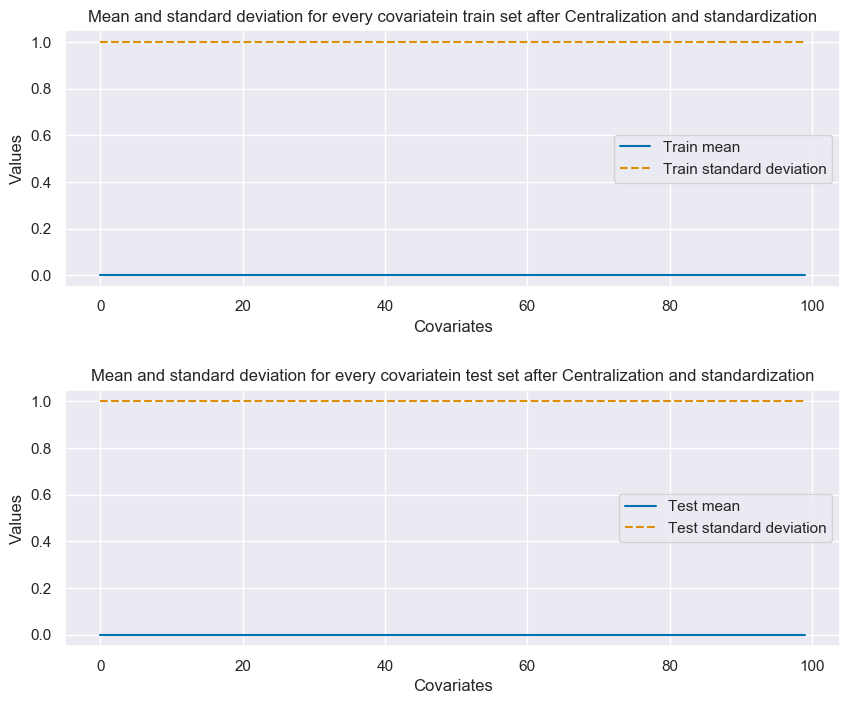

In [10]:
# Plotting the mean and standard deviation of every covariate in a single plot
# after Centralization and standardization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
fig.subplots_adjust(hspace=0.4)

X_train = StandardScaler().fit_transform(X_train)
ax1.plot(X_train.mean(axis=0), label="Train mean")
ax1.plot(X_train.std(axis=0), label="Train standard deviation", ls='--')
ax1.legend()
ax1.set_xlabel('Covariates')
ax1.set_ylabel('Values')
ax1.set_title('Mean and standard deviation for every covariate' +
              'in train set after Centralization and standardization')

X_test = StandardScaler().fit_transform(X_test)
ax2.plot(X_test.mean(axis=0), label="Test mean")
ax2.plot(X_test.std(axis=0), label="Test standard deviation", ls='--')
ax2.legend()
ax2.set_xlabel('Covariates')
ax2.set_ylabel('Values')
ax2.set_title('Mean and standard deviation for every covariate' +
              'in test set after Centralization and standardization')

plt.show()

# Centralization and standardization of y
y_train = scale(y_train)
y_test = scale(y_test)


<blockquote> 
Centering the variables is especially important for the LASSO because it is usually defined with centered variables so that we can skip estimating the intercept. But in any method a centered variable means that the intercept doesn't need to me estimated, which is interesting for our model.
    
It is also important to scale the data so that the coefficients are in the same order of magnitude. Imagining in Lasso, that a variable is on a much larger scale than the others, even if it is relevant, its coefficient may be small to compensate for its scale. If it is less than a threshold, Lasso will transform this coefficient equal to zero, which may not be ideal for our prediction model.

In [11]:
# Creating two empty dataFrames
df_test = pd.DataFrame()
df_coef = pd.DataFrame()
results = []


# Exercice 2

<blockquote> The formula for the determination coefficient $\hat{R}^2$ is the following:
 $$\hat{R}^2=1-\frac{||Y-\hat{Y}||^2}{||Y-\bar{Y}\mathbf{1}_n||^2}$$
 
The formula for the mean squared error:
$$ \frac{1}{n}\sum^n_{i=1}(Y_i-\hat{Y}_i)^2$$

In [17]:
# function to compute the determination coefficient
def R2(y_pred, y_true):
    r2 = 1 - sum((y_true - y_pred)**2) \
        / sum((y_true - np.mean(y_true)*np.ones(len(y_true)))**2)
    return r2
# function to compute the mean squared error.


def MSE(x, y):
    mse = sum((y - x)**2)/len(x)
    return mse


# Exercice 3

<blockquote>In the following, the OLS regression from sklearn will be applied to the data, which solves the following optimization problem: 
    
$$\hat{\theta}_n \in argmin ||Y-Z\theta||_2^2$$

In [12]:
# linear regression using sklearn library
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
reg_coef = reg.coef_

# determination coefficient and the MSE of the test data
print("Determination coefficient: ", R2(y_pred, y_test))
print("MSE: ", MSE(y_pred, y_test))
print("\nvalues for R2 and MSE using sklearn to check that",
      " functions from ex2 are correct:", r2_score(y_test, y_pred),
      "; ", mean_squared_error(y_test, y_pred))

# adding columns
df_test["OLS"] = y_pred
df_coef["OLS"] = reg_coef


Determination coefficient:  0.5455634759590919
MSE:  0.4544365240409082

values for R2 and MSE using sklearn to check that  functions from ex2 are correct: 0.5455634759590915 ;  0.4544365240409084


# Exercice 4

<blockquote>Below is the result of the covariance matrix. When two covariates i and j have a strongly positive correlated, the value of the element $m_{I,j}$ will be close to one. If they are strongly negatively correlated, it will be equal to minus one. If the have no correlation, it will be close to zero. 
    
It can be seen that most covariates of this dataset have a weak correlation between them.


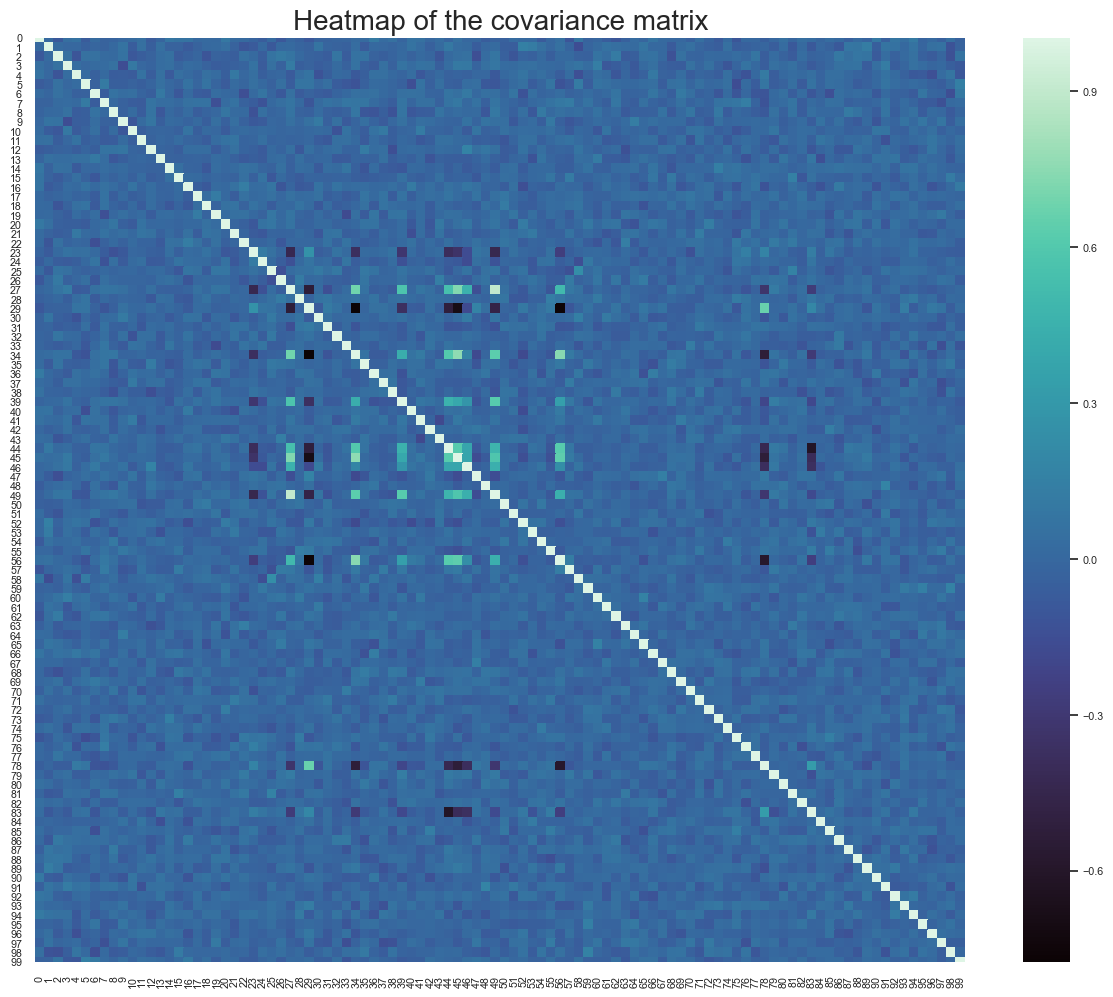

In [19]:
# plot of the heatmap of the covariance matrix.
cov_matrix = np.cov(X_train.T)
plt.figure(figsize=(15, 12))
sns.set(font_scale=0.7)
sns.heatmap(cov_matrix, xticklabels=True, yticklabels=True, cmap="mako")
plt.title("Heatmap of the covariance matrix", fontsize=20)
plt.show()


In [14]:
# singular value decomposition of the covariance matrix
U, s, V = np.linalg.svd(cov_matrix)


# Exercice 5

(100, 2)


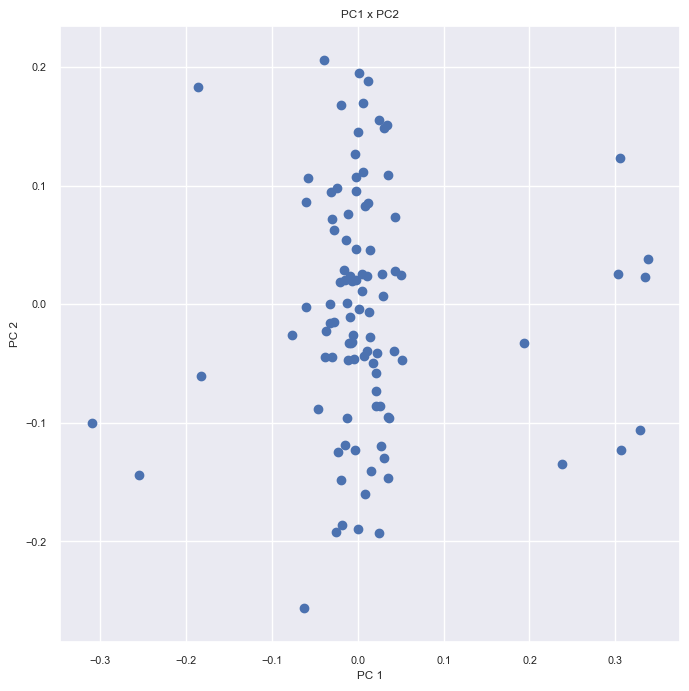

In [16]:
PCA = U[:, [0, 1]]
print(PCA.shape)
plt.figure(figsize=(8, 8))
plt.scatter(PCA[:, 0], PCA[:, 1])
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("PC1 x PC2")
plt.show()


# Exercice 6

In [17]:
# projected data for train and the test set,
X_train_PC2 = np.matmul(X_train, PCA)
X_test_PC2 = np.matmul(X_test, PCA)
# linear regression using sklearn library for low dimensional data,
reg = LinearRegression().fit(X_train_PC2, y_train)
y_pred = reg.predict(X_test_PC2)
reg_coef = reg.coef_
# determination coefficient and the MSE of the test data
print("Determination coefficient: ", R2(y_pred, y_test))
print("MSE: ", MSE(y_pred, y_test))
# adding column
df_test["pca_ols"] = y_pred


Determination coefficient:  0.21900550335570834
MSE:  0.7809944966442918


# Exercice 7

<blockquote>It can be seen in the graph bellow, that for the first PC, about 12 variables have a heavy weight in this low dimensional representation. For the second PC, the loadings are more evenly distributed between variables, meaning its weights are more similar.

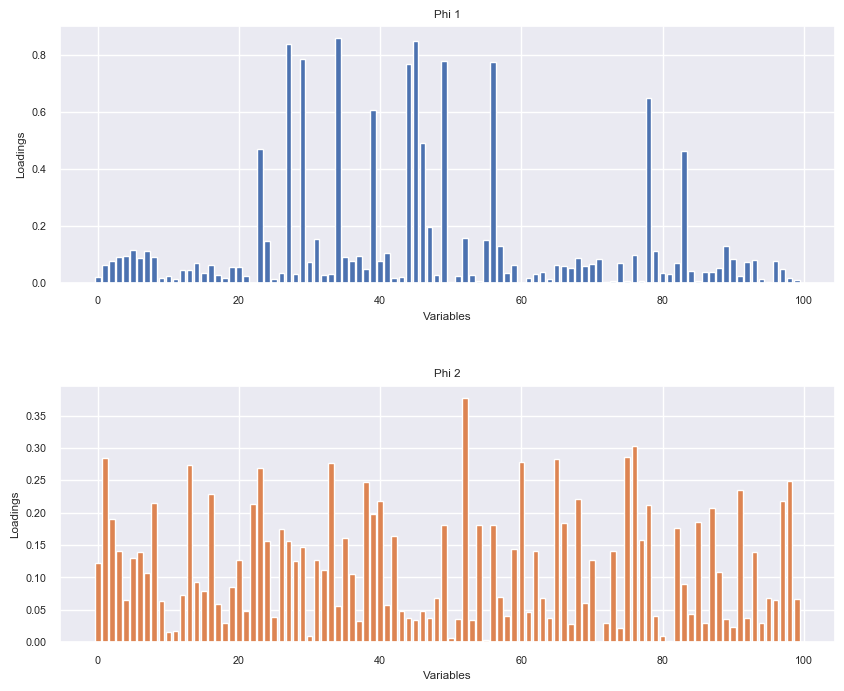

In [18]:
# Computing the absolute values of the loadings on the first two PC.
phi1 = PCA[:, 0] * np.sqrt(s[0])
phi2 = PCA[:, 1] * np.sqrt(s[1])
# plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
fig.subplots_adjust(hspace=0.4)
ax1.bar(np.arange(phi1.size), np.abs(phi1))
ax1.set_ylabel('Loadings')
ax1.set_title("Phi 1")
ax1.set_xlabel('Variables')
ax2.bar(np.arange(phi2.size), np.abs(phi2), color='C1')
ax2.set_ylabel('Loadings')
ax2.set_title("Phi 2")
ax2.set_xlabel('Variables')
plt.show()


# Exercice 8

<blockquote>In the following, the Lasso regression from sklearn will be applied to the data, which solves the following optimization problem: 
    
$$\hat{\theta}_n \in argmin \left(\frac{1}{2}||Y-Z\theta||_2^2 + \alpha||\theta||_1\right) $$

In [19]:
# LASSO using sklearn library
alphas = np.logspace(np.log10(10e-3), np.log10(10e1), 30)
reg = LassoCV(cv=5, n_alphas=30, alphas=alphas).fit(X_train, y_train)
y_pred = reg.predict(X_test)
reg_coef = reg.coef_
# determination coefficient and the MSE of the test data
print("Determination coefficient: ", R2(y_pred, y_test))
print("MSE: ", MSE(y_pred, y_test))
# adding columns
df_test["lasso"] = y_pred
df_coef["lasso"] = reg_coef


Determination coefficient:  0.579524056166723
MSE:  0.42047594383327697


# Exercise 9

<blockquote>In the following, the Ridge regression from sklearn will be applied to the data, which solves the following optimization problem: 
    
$$\hat{\theta}_n \in argmin \left(||Y-Z\theta||_2^2 + \alpha||\theta||^2\right) $$

In [20]:
# RIDGE using sklearn library
alphas = np.logspace(np.log10(10e-1), np.log10(10e2), 30)
reg = RidgeCV(alphas=alphas).fit(X_train, y_train)
y_pred = reg.predict(X_test)
reg_coef = reg.coef_
# determination coefficient and the MSE of the test data
print("Determination coefficient: ", R2(y_pred, y_test))
print("MSE: ", MSE(y_pred, y_test))
# adding columns
df_test["Ridge"] = y_pred
df_coef["Ridge"] = reg_coef


Determination coefficient:  0.5388584642277531
MSE:  0.461141535772247


# Exercise 10

<blockquote> In the following, the method of forward selection will be implemented. It is a is a greedy method that at each step aims at selecting the most “important” variable. The method starts with no covariate and add a new one at each step.

In [22]:
# function to determine order of forward variable selection,
# without stop criterion


def forward_variable_selection(X, Y):
    # coping y into r so that we don't modify original y
    r = np.copy(Y)
    # list of ordered variables
    variables = []
    # At each step we will select one variable to add to our list
    for n in range(X.shape[1]):
        TETAS = []
        T = []
        # going through all variables to search for largest T/smallest p-value
        for i in range(X.shape[1]):
            if(i not in variables):
                # fitting model using only one covariate at a time
                ols = LinearRegression(fit_intercept=True)
                reg = ols.fit(X[:, i].reshape(-1, 1), r)
                reg_coef = reg.coef_
                reg_int = reg.intercept_
                teta = np.array([reg_int, reg_coef[0]])
                TETAS.append(teta)
                # calculating Gram matrix, noise and s
                Gram = np.matmul(np.c_[np.ones(X.shape[0]), X[:, i]].T,
                                 np.c_[np.ones(X.shape[0]),
                                       X[:, i]]) / X.shape[0]
                noise = np.linalg.norm(r - np.matmul(np.c_[np.ones(X.shape[0]),
                                                           X[:, i]], teta),
                                       ord=2)**2 / (X.shape[0]-2)
                s = np.dot(np.dot(np.array([0, 1]).T,
                           np.linalg.inv(Gram)), np.array([0, 1]))
                # using values to calculate T
                t = np.sqrt(X.shape[0]) * \
                    np.linalg.norm(teta, ord=1)/np.sqrt(noise * s)
                T.append(float(t))
            else:
                T.append(0)
                TETAS.append(np.array([0, 0]))
        # the selected variable at each step will have the largest T
        # append it to the variables list
        sel = T.index(max(T))
        variables.append(sel)
        # replacing the output Y by the residual
        r -= np.matmul(np.c_[np.ones(X.shape[0]), X[:, sel]], TETAS[sel])
    return variables


In [23]:
var_t = forward_variable_selection(X_train, y_train)
print("Order of variable selection without stop condition: ", var_t)


Order of variable selection without stop condition:  [44, 46, 29, 83, 62, 28, 9, 22, 33, 75, 24, 66, 15, 63, 20, 10, 76, 97, 4, 34, 56, 88, 53, 51, 25, 18, 47, 90, 58, 91, 16, 99, 5, 82, 31, 78, 17, 92, 36, 42, 38, 52, 21, 77, 73, 86, 6, 8, 40, 3, 94, 89, 61, 11, 7, 96, 95, 48, 43, 41, 49, 27, 45, 87, 54, 93, 60, 57, 67, 2, 39, 69, 19, 70, 14, 68, 59, 98, 32, 26, 81, 37, 79, 50, 0, 1, 85, 64, 12, 55, 30, 71, 74, 84, 80, 23, 35, 65, 13, 72]


# Exercise 11

In [12]:
# function to determine order of forward variable selection,
# with stop criterion and ploting graphs


def forward_variable_selection_stop(X, Y):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
    fig.subplots_adjust(hspace=0.4)
    ls = ['-', '--', 'dotted']
    # coping y into r so that we don't modify original y
    r = np.copy(Y)
    # list of ordered variables
    variables = []
    # list of p-values of variable selected at each step
    P_vals = []
    # At each step we will select one variable to add to our list
    for n in range(X.shape[1]):
        TETAS = []
        T = []
        # going through all variables to search for largest T/smallest p-value
        for i in range(X.shape[1]):
            if(i not in variables):
                # fitting model using only one covariate at a time
                ols = LinearRegression(fit_intercept=True)
                reg = ols.fit(X[:, i].reshape(-1, 1), r)
                reg_coef = reg.coef_
                reg_int = reg.intercept_
                teta = np.array([reg_int, reg_coef[0]])
                TETAS.append(teta)
                # calculating Gram matrix, noise and s
                Gram = np.matmul(np.c_[np.ones(X.shape[0]), X[:, i]].T,
                                 np.c_[np.ones(X.shape[0]),
                                       X[:, i]]) / X.shape[0]
                noise = np.linalg.norm(r - np.matmul(np.c_[np.ones(X.shape[0]),
                                                           X[:, i]], teta),
                                       ord=2)**2 / (X.shape[0]-2)
                s = np.dot(np.dot(np.array([0, 1]).T,
                           np.linalg.inv(Gram)), np.array([0, 1]))
                # using values to calculate T
                t = np.sqrt(X.shape[0]) * \
                    np.linalg.norm(teta, ord=1)/np.sqrt(noise * s)
                T.append(float(t))
            else:
                T.append(0)
                TETAS.append(np.array([0, 0]))
        # the selected variable at each step will have the largest T,
        # append it to the variables list
        sel = T.index(max(T))
        # calculate p-value using T
        p_value = 2*(1-stats.norm.cdf(max(T)))
        P_vals.append(p_value)
        # our stop criterion will be p-value<0.05,
        # so stop adding to the variables list if p-value>0.05
        if(p_value < 0.05):
            variables.append(sel)
            if(n < 50):
                # Plotting the graph of p-values with the first 50 values
                ax2.scatter(n, p_value, color='b')
        else:
            if(n < 50):
                # Plotting the graph of p-values with the first 50 values
                ax2.scatter(n, p_value, color='r')
        # replacing the output Y by the residual
        r -= np.matmul(np.c_[np.ones(X.shape[0]), X[:, sel]], TETAS[sel])
        # plot of graph of the test statistics obtained
        # when selecting the 1st, 2nd and 3rd variables
        if(n < 3):
            cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
            ax1.plot(T, label="step " + str(n + 1), color=cycle[n], ls=ls[n])
            ax1.plot(sel, T[sel], 'o', color=cycle[n])
            ax1.annotate(str(sel), (sel + 1, T[sel] + 0.5))
            ax1.legend(loc=1, fontsize="large")
            ax1.set_title('Values of the t-stat at forst 3 steps')
            ax1.set_xlabel('Covariates')
            ax1.set_ylabel('Values of test statics')
    # seting specifications for p-value graph
    ax2.axhline(y=0.05, color='r', label="ordinate 0.05")
    ax2.set_title('Plot of the pvalues')
    ax2.set_ylabel('P-values')
    ax2.set_xlabel('Steps')
    ax2.legend(loc=2, fontsize="large")
    plt.show()
    print("No p-value is larger than 0.05.",
          "Forward variable selection finished. ",
          len(variables), " variables selected.")
    return variables


<blockquote> In the first graph, the evolution of the T score for each variable in the first three iterations of the method can be observed. We can note that after one variable is selected (variables selected are signalized), it's value for the next iterations will be equal to zero. <br>
    
In the following graph, it's displayed the evolution of the p-value for the selected variable at each iteration. The stop criterion is that no p-value is smaller than 0.05 (red line), so that means that if the p-value for the selected variable is greater than 0.05 (the chosen variable has the smallest p-value), then the method stops. This means that the red dots above the red line are variables that won't be selected using this stop criterium.

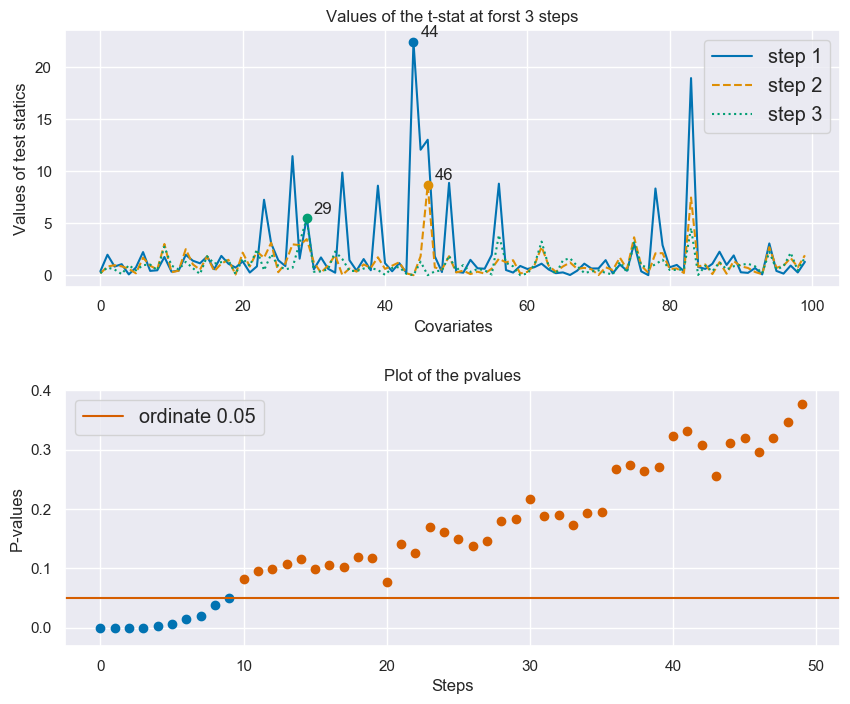

No p-value is larger than 0.05. Forward variable selection finished.  10  variables selected.
Variables selected:  [44, 46, 29, 83, 62, 28, 9, 22, 33, 75]


In [13]:
var = forward_variable_selection_stop(X_train, y_train)
print("Variables selected: ", var)


# Exercise 12

In [26]:
# linear regression using sklearn library
X_train_sel = X_train[:, var]
X_test_sel = X_test[:, var]
reg = LinearRegression().fit(X_train_sel, y_train)
reg_coef = reg.coef_
y_pred = reg.predict(X_test_sel)
# determination coefficient and the MSE of the test data
print("Determination coefficient: ", R2(y_pred, y_test))
print("MSE: ", MSE(y_pred, y_test))
# seting coefficients of variables not selected to 0
coefs = np.zeros(X_train.shape[1])
n = 0
for i in var:
    coefs[i] = reg_coef[n]
    n += 1
# adding columns
df_test["FVS"] = y_pred
df_coef["FVS"] = coefs


Determination coefficient:  0.554928991770794
MSE:  0.4450710082292061


# Exercise 13

<blockquote>Summarising the results of all our methods, most of them gave us similar results according to the determination coefficient $\hat{R}^2$ and MSE metricas, with the exception of the OLS after PCA, wich gave poor results. 
    
* **OLS:**
    - Determination coefficient:  0.5455634759590919
    - MSE:  0.4544365240409082

* **OLS after PCA:**
    - Determination coefficient:  0.21900550335570834
    - MSE:  0.7809944966442918

* **Lasso:**
    - Determination coefficient:  0.579524056166723
    - MSE:  0.42047594383327697

* **Ridge:**
    - Determination coefficient:  0.5388584642277531
    - MSE:  0.461141535772247

* **OLS after forward variable selection:**
    - Determination coefficient: 0.554928991770794 
    - MSE: 0.4450710082292061
    
Just considering these metrics, the Lasso gave us the best results, followed by OLS after forward variable selection.; OLS, Ridge and OLS after PCA.

As it can be seen in the comparison graph between coefficients bellow, the OLS after forward variable selection has most of coefficients equal to zero and the lasso has some.
One remark is that even if the values coefficient varies between methods, a coefficient with relative high value tns to have a relative high value for all methods.


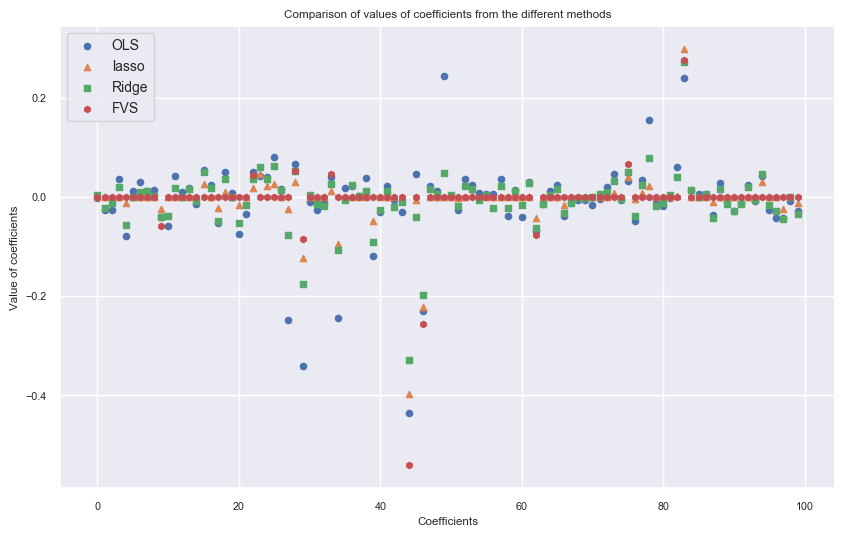

In [27]:
plt.figure(figsize=(10, 6))
marker = ['o', '^', 's', 'h']
n = 0
# Plotting coefficients for each method
for i in df_coef:
    plt.scatter(np.arange(df_coef[i].size), df_coef[i],
                label=i, marker=marker[n], s=20)
    n += 1
plt.title('Comparison of values of coefficients from the different methods')
plt.ylabel('Value of coefficients')
plt.xlabel('Coefficients')
plt.legend(loc=2, fontsize="large")
plt.show()


# Exercise 14

In [28]:
# num of coef equal to zero = num of coef- num of coef!=0
print("Number of coefficients set exactly to zero by each of the methods:\n")
for i in df_coef:
    n_zeros = df_coef[i].size - np.count_nonzero(df_coef[i])
    print("  - ", i, ": ", n_zeros, "coefficients set to zero")
    

Number of coefficients set exactly to zero by each of the methods:

  -  OLS :  0 coefficients set to zero
  -  lasso :  63 coefficients set to zero
  -  Ridge :  0 coefficients set to zero
  -  FVS :  90 coefficients set to zero


<blockquote> The difference between the Lasso and the Ridge is that the Lasso gives us a sparce solution, the ridge doesn’t.  The number of bells different to zero is due to the geometry of the $l_1$ and $l_2$ constraint bells. The lassos $l_1$ allow us to have a solution with some coefficients equal to zero.
    
Bellow we can see the example of the $l_1$(right) and $l_2$(left) constraints geometry:
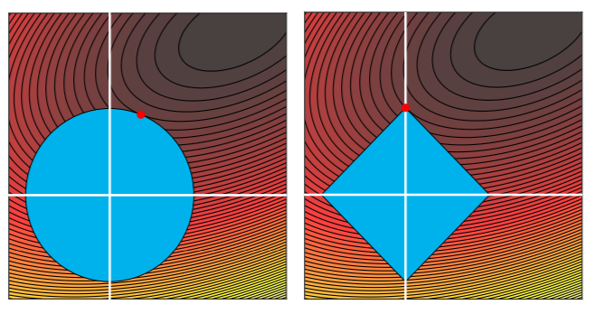

Is also worth mentioning that the OLS doesn’t sets coefficients to zero. And we have 90 coefficients set to zero after the forward variable selection, as we selected 10 variables with the no p-value smaller than 0.05 criterium. 


# Exercise 15

<blockquote> In the pairplot, the principal diagonal corresponds to the distribution of the corresponding method. The other elements correspond to the scatter plot comparing the two corresponding methods. In the scatter plot, the more the data resembles a 45-degree line, the more it is similar.
    
As expected, it can be seen that the PCA OLS is the one that differs the most from other methods, this happens because using only two principal components is a rough approximation of our data.

The other results seem to present a considerable level of similarity.

For the $\hat{\theta}^{rd},\hat{\theta}^{ols},\hat{\theta}^{ls}$ the equation to predict the value of a new, unseen and normalized data point x is equal to: $y=\hat{\theta}x$

For the $\hat{\theta}^{pca}$ we need to first, project our new unseen data to the principal components used in the prediction model, so, our equation will be equal to: $y=\hat{\theta}xU_n$, where n is equal the number of PCAs used.

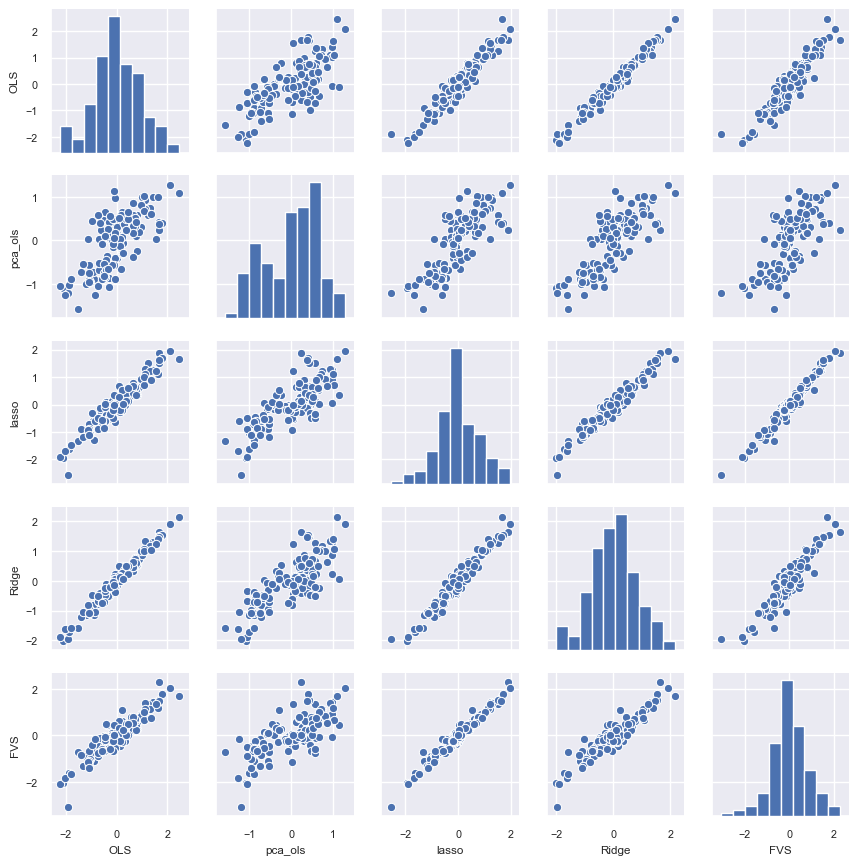

In [29]:
# Plotting pairplot graph for all methods
sns.pairplot(df_test, height=1.75)
plt.show()
